In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

In [75]:
file_name = "4_SB.xlsx"
df = pd.read_excel(file_name)

In [76]:
import numpy as np
X = df[['Precipitation', 'Airtemp']].values  # Features
y = df['swe'].values  # Target

# Handle missing values in X and y
from sklearn.impute import SimpleImputer

imputer_X = SimpleImputer(strategy='mean')
X_imputed = imputer_X.fit_transform(X)

imputer_y = SimpleImputer(strategy='mean')
y_imputed = imputer_y.fit_transform(y.reshape(-1, 1)).ravel()

# Normalize the features
X_scaled = (X_imputed - X_imputed.mean(axis=0)) / X_imputed.std(axis=0)

# Define the sequence length (number of time steps)
sequence_length = 5  # You can adjust this based on your preference

# Reshape the data for CNN
X_reshaped = []
y_reshaped = []
for i in range(len(X_scaled) - sequence_length + 1):
    X_reshaped.append(X_scaled[i:i + sequence_length])
    y_reshaped.append(y_imputed[i + sequence_length - 1])

X_reshaped = np.array(X_reshaped)
y_reshaped = np.array(y_reshaped)

# Split the data into training and testing sets
split_index = int(0.8 * len(X_reshaped))
X_train, X_test = X_reshaped[:split_index], X_reshaped[split_index:]
y_train, y_test = y_reshaped[:split_index], y_reshaped[split_index:]


In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Define the CNN model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(5, 2)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
cnn_history = cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)


Epoch 1/50


c:\Users\pkaur\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 25.8737 - val_loss: 5.7238
Epoch 2/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.8346 - val_loss: 2.8563
Epoch 3/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.4946 - val_loss: 4.6973
Epoch 4/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.2385 - val_loss: 2.8507
Epoch 5/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.4202 - val_loss: 3.6609
Epoch 6/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.9126 - val_loss: 8.1988
Epoch 7/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.5220 - val_loss: 1.9939
Epoch 8/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.0309 - val_loss: 8.1759
Epoch 9/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.2988 - val_loss: 5.5849
Epoch 10/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.8020 - val_loss: 4.0141
Epoch 11/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.6393 - val_loss: 1.5613
Epoch 12/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [78]:
y_pred = cnn_model.predict(X_test)

#Ensure y_test and y_pred are 1-dimensional arrays
y_test_flat = np.ravel(y_test)
y_pred_flat = np.ravel(y_pred)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [79]:
from sklearn.metrics import mean_squared_error

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print("Mean Squared Error:", mse)

Mean Squared Error: 3.524814338755316


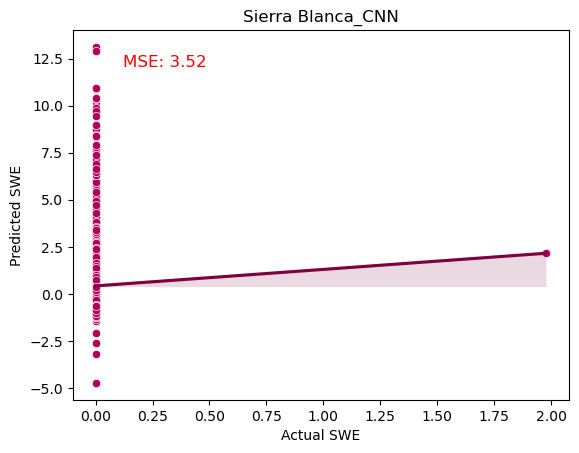

In [80]:
plot_data = pd.DataFrame({'Actual SWE': y_test_flat, 'Predicted SWE': y_pred_flat})
sns.scatterplot(data=plot_data,x='Actual SWE', y='Predicted SWE', color= "#b10059")

sns.regplot(data=plot_data, x='Actual SWE', y='Predicted SWE', scatter=False, color='#7e003f')
plt.text(0.1, 0.9, f'MSE: {mse:.2f}', transform=plt.gca().transAxes, fontsize=12, color='red')
plt.title('Sierra Blanca_CNN')
plt.savefig('SB_CNN.png', dpi=1200)